In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [213]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Анализ датасета

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Основные параметры банковской операции - время платежа (Time), его сумма (Amount) и набор безымянных параметров V1-V28 <br>
Все параметры банковской операции представлены числами типа float<br>
В роли target-переменной выступает параметр Class, представленный целым числом 0 или 1 (в зависимости от того, является операция легальной или мошеннеческой)

In [215]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Можно заметить, что параметры времени операции и суммы платежа сильно отличаются от остальных переменных, что видно по их среднему и стандартному отклонению<br>

In [216]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [217]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Датасет не содержит пустых полей

In [218]:
df.duplicated().sum()

1081

In [219]:
df = df.drop_duplicates(keep='first')

В датасете была 1081 идентичная строка<br>
Они удалены

In [220]:
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

C:\Users\mchav\AppData\Local\Temp\ipykernel_8096\2258041869.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_сlasses = pd.value_counts(df['Class'], sort=True)


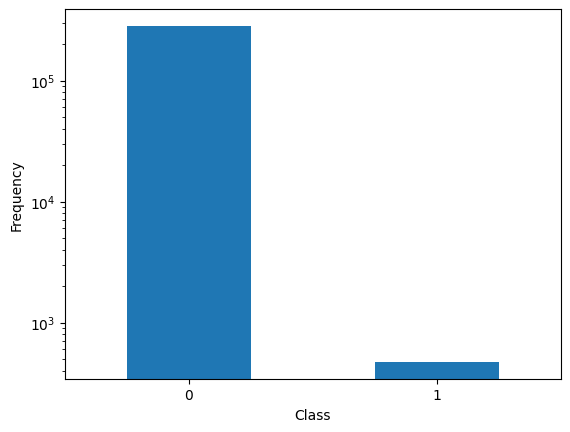

In [221]:
count_сlasses = pd.value_counts(df['Class'], sort=True)
count_сlasses.plot(kind = 'bar', rot = 0)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

Данные сильно несбалансированы - мошеннечских операций 473 против 283253 немошеннеческих<br>
Разделим датасет на два по этому критерию

In [222]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(fraud.shape, normal.shape)

(473, 31) (283253, 31)


Попробуем рассмотреть зависимости между параметрами в исходном несбалансированном датасете<br>
Например, связь между временем и суммой операции

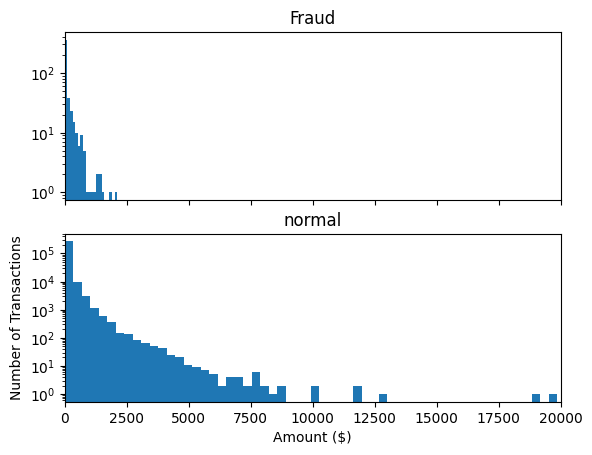

In [223]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
ax1.hist(fraud.Amount, bins = 20)
ax1.set_title('Fraud')
ax1.set_yscale("log")

ax2.hist(normal.Amount, bins = 75)
ax2.set_title('normal')
ax2.set_yscale('log')

plt.xlabel("Amount ($)")
plt.ylabel("Number of Transactions")

plt.xlim(0,20000)
plt.show()

Можно видеть что среди мошеннеческих операций, в отличие от легальных, не представлены операции суммой более 2500$, однако среди легальных операций такие платежи составляют малую часть (~10^2) по сравнению с платежами меньших сумм (~10^4-10^5) 

Рассмотрим попарные зависимости между временем и суммой платежа

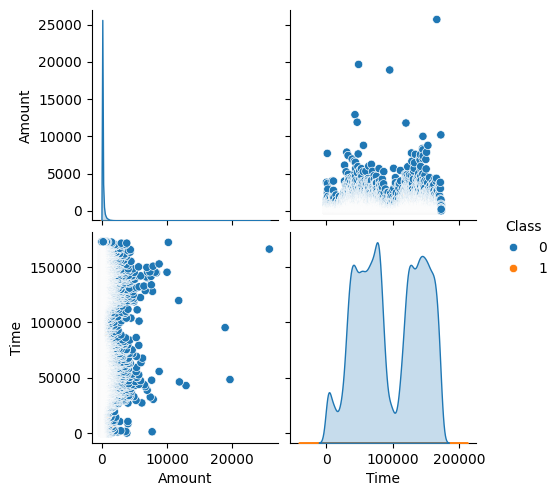

In [224]:
sns.pairplot(df[["Amount", "Time", "Class"]], hue="Class")

Полученные графики малорепрезентативны, так как данные о легальных платежах подавляют данные о мошеннеческих<br>
Таким образом необходима балансировка датасета

Рассмотрим матрицу корреляций параметров

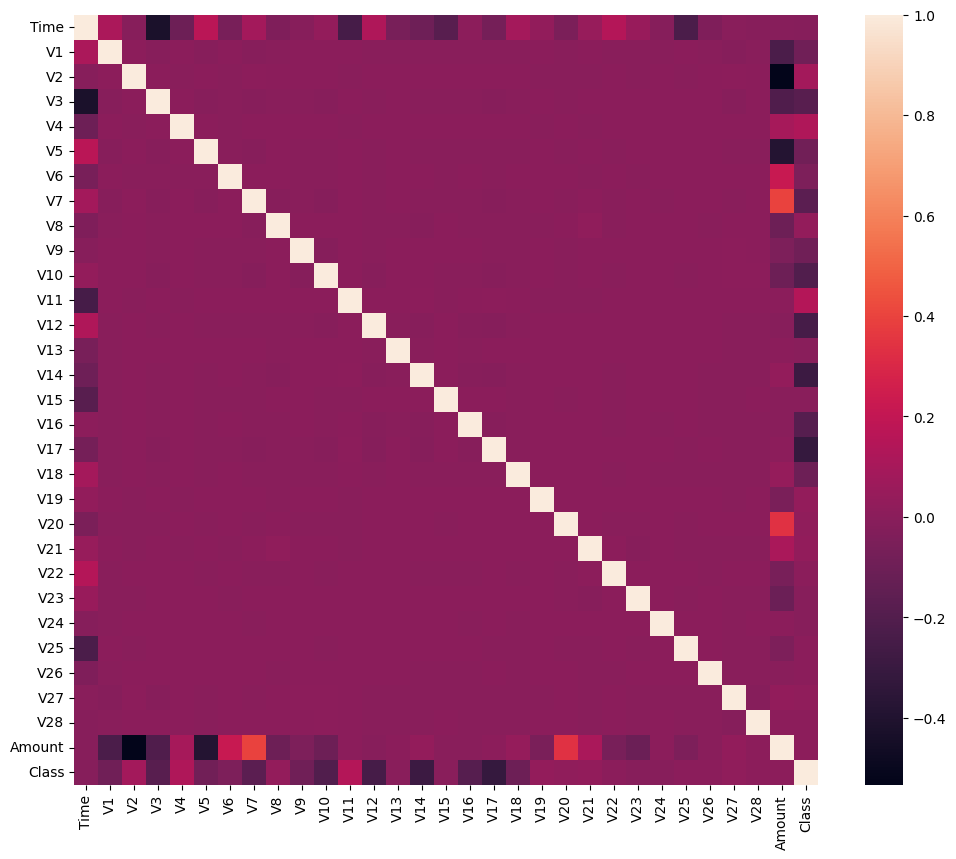

In [225]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())
plt.show()

Из матрицы можно сделать вывод о малой корреляции времени и суммы платежа с видом операции, при этом видно, что больше всего с видом платежа коррелируют безымянные параметры V12, V14, V17

Осуществим наконец балансировку датасета<br>
Выделим из датасета с легальными операциями произвольную выборку такого же размера, как и датасет с мошеннеческими операциями с помощью функции sample()

In [226]:
#fraud_sampled = df[df['Class']==1].sample(n = fraud.shape[0], random_state=21)
normal_sampled = df[df['Class']==0].sample(n = fraud.shape[0], random_state=21)
print(f' Fraud Shape{fraud.shape}\n No Fraud shape{normal_sampled.shape}')

 Fraud Shape(473, 31)
 No Fraud shape(473, 31)


In [227]:
fraud_sampled = fraud
final_df = pd.concat([fraud_sampled, normal_sampled], ignore_index=True)
final_df.shape

(946, 31)

Построим аналогичные графики для отбаланированного датасета

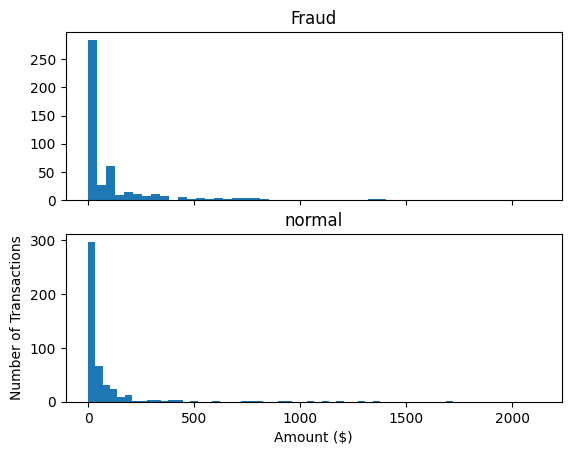

In [228]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
bins = 50
ax1.hist(fraud_sampled.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal_sampled.Amount, bins=bins)
ax2.set_title('normal')

plt.xlabel("Amount ($)")
plt.ylabel("Number of Transactions")
plt.show()

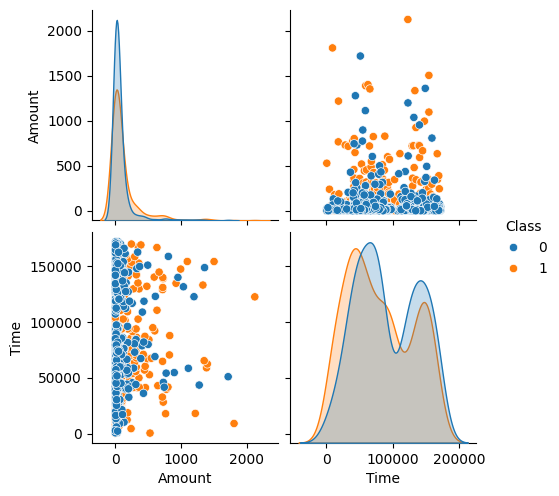

In [229]:
sns.pairplot(final_df[["Amount", "Time", "Class"]], hue="Class")

Из полученных графиков можно подтвердить вывод о малой корреляции времени и суммы операции с ее видом<br>
Таким образом по этим критериям данные плохоотделимы

Рассмотрим попарные зависимости для хорошо коррелирующих признаков V12, V14, V17 (определенным по матрице корреляций)

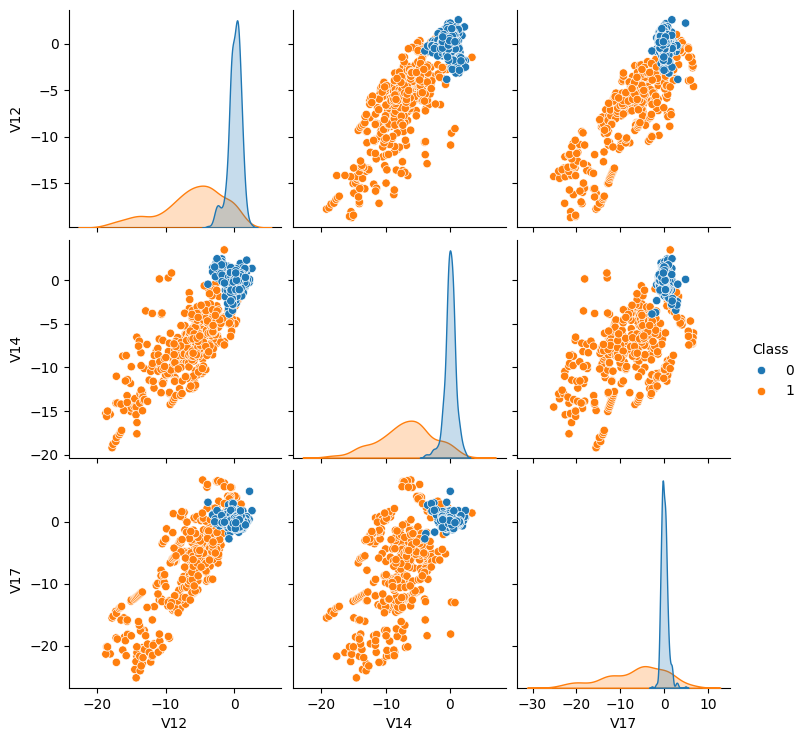

In [230]:
sns.pairplot(final_df[["V12", "V14", "V17", "Class"]], hue="Class")

Видно, что несмотря на некоторое наложение данных, по этим критериям возможно отделить данные друг от друга

Для наглядности также приведем попарные зависимости плохо коррелирующих параметров

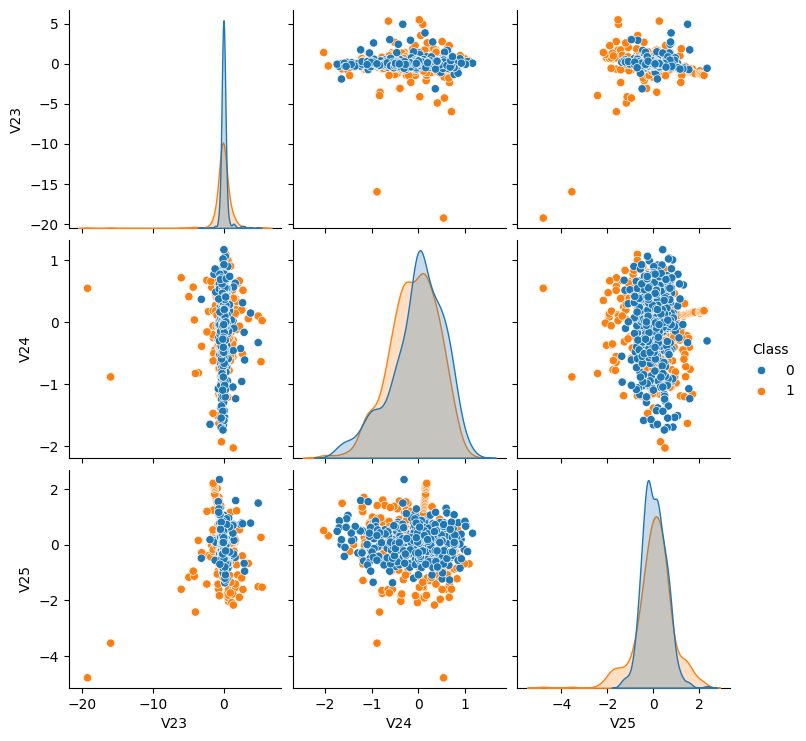

In [231]:
sns.pairplot(final_df[["V23", "V24", "V25", "Class"]], hue="Class")

### Обучение модели на сбалансированной выборке и результаты

Разделим данные на входные параметры модели и target-переменную

In [232]:
x_data = final_df.drop(columns="Class", axis=1)
y_data = final_df["Class"]

Для того чтобы все входные параметры были близки по масштабам, применим к ним инструмент StandardScaler, осуществляющую "нормировку" параметров, вычитая среднее и деля на стандартное отклонение

In [233]:
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

Разделим данные на test- и train-выборки в соотношении 80/20

In [234]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.20, random_state=21)

In [235]:
def train_and_report(model, X_test, X_train, Y_test, Y_train):
    model.fit(X_train, Y_train)
    y_pred_train = model.predict(X_train)
    y_train_cl_report = classification_report(Y_train, y_pred_train, target_names = ['No Fraud', 'Fraud'])
    print("_"*100)
    print("TRAIN MODEL CLASSIFICATION REPORT")
    print("_"*100)
    print(y_train_cl_report)
    y_test_pred = model.predict(X_test)
    y_test_cl_report = classification_report(Y_test, y_test_pred, target_names = ['No Fraud', 'Fraud'])
    print("_"*100)
    print("TEST MODEL CLASSIFICATION REPORT")
    print("_"*100)
    print(y_test_cl_report)
    print("_"*100)

Для оценки полученных результатов воспользуемся инструментом classification_report()<br>
**prescision** - доля операций, определенных классификатором к данному классу и действительно ему принадлежащих<br>
**recall** - доля операций из данного класса, отнесенных к нему классификатором<br>
**f1-score** - среднее гармоническое prescision и recall<br>
**support** - число операций, отнесенных к данному классу

In [236]:
lr = LogisticRegression()
train_and_report(lr, x_train, x_test, y_train, y_test)

____________________________________________________________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       0.93      0.98      0.95        93
       Fraud       0.98      0.93      0.95        97

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       0.92      0.95      0.94       380
       Fraud       0.95      0.92      0.94       376

    accuracy                          

In [237]:
Kneib = KNeighborsClassifier(n_neighbors = 3)
train_and_report(Kneib, x_train, x_test, y_train, y_test)

____________________________________________________________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       0.89      1.00      0.94        93
       Fraud       1.00      0.88      0.93        97

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       0.88      0.94      0.91       380
       Fraud       0.94      0.88      0.91       376

    accuracy                          

In [238]:
svm_clf = SVC(kernel='linear')
train_and_report(svm_clf, x_train, x_test, y_train, y_test)

____________________________________________________________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       0.93      0.97      0.95        93
       Fraud       0.97      0.93      0.95        97

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       0.92      0.94      0.93       380
       Fraud       0.94      0.92      0.93       376

    accuracy                          

**Вывод**: наилучшие результаты на тестовой выборке (основываясь на метрике f1-score) показала модель логистической регрессии, точность определения операции в обоих классах составила 94%<br>
Для модели Knn наилучший результат получен при числе соседей = 3 и составил 91%, с увеличением и уменьшением количества соседей точность уменьшалась<br>
Для модели SVC с линейным ядром точность составила 93%. При использовании полномиального ядра второго порядка точность определения операций в классах уменьшилась до 76% и 58% соответственно, и падала с увеличением степени полинома


### Обучение модели на несбалансированной выборке и результаты

In [239]:
raw_x_data = df.drop(columns="Class", axis=1)
raw_y_data = df["Class"]

In [240]:
raw_x_data = scaler.fit_transform(raw_x_data)

In [241]:
raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(raw_x_data,raw_y_data, test_size=0.20, random_state=21)

In [242]:
train_and_report(lr, raw_x_train, raw_x_test, raw_y_train, raw_y_test)

____________________________________________________________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56654
       Fraud       0.88      0.55      0.68        92

    accuracy                           1.00     56746
   macro avg       0.94      0.78      0.84     56746
weighted avg       1.00      1.00      1.00     56746

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    226599
       Fraud       0.85      0.60      0.70       381

    accuracy                          

In [243]:
train_and_report(Kneib, raw_x_train, raw_x_test, raw_y_train, raw_y_test)

____________________________________________________________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56654
       Fraud       0.96      0.73      0.83        92

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    226599
       Fraud       0.93      0.69      0.79       381

    accuracy                          

In [244]:
train_and_report(svm_clf, raw_x_train, raw_x_test, raw_y_train, raw_y_test)

____________________________________________________________________________________________________
TRAIN MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56654
       Fraud       0.82      0.72      0.77        92

    accuracy                           1.00     56746
   macro avg       0.91      0.86      0.88     56746
weighted avg       1.00      1.00      1.00     56746

____________________________________________________________________________________________________
TEST MODEL CLASSIFICATION REPORT
____________________________________________________________________________________________________
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    226599
       Fraud       0.83      0.80      0.81       381

    accuracy                          

**Вывод**: Обучение модели на несбалансированной выборке приводит к перевесу точности в пользу класса, который представлен в датасете в большем объеме.<br>
Так, все три модели на тестовой выборке дали точность 100% при определении, относится ли операция к легальной. При этом точность f1 определения отношения операции к мошеннеческой не превысила 81% (получно на модели SVM), а метрика recall составила 80%. Таким образом, 20% мошеннеческих операций были отнесены к классу легальных, но в силу заведомо меньшей мощности множества мошеннеческих операций в подвыборке, это не сказалось на метрике для легальных операций. Так что можно сказать, что высокая точность определения легальных операций объясняется лишь тем, что подвыборка содержит намного большее их число, а само обучение модели на несбалансированной выборке имеет невысокое качество.